In [1]:
df <- read.csv('clusteringdata.csv')
head(df)

,city,latitude,longitude,snowy_weather_count,avg_temperature,avg_humidity,avg_pressure,avg_wind_speed,avg_wind_direction,pca1,pca2,pca3
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albuquerque,35.08449,-106.65114,25,34.25216,79.60000,1010.120,4.600000,202.2400,0.53369676,-0.08060821,-0.16327536
2,Atlanta,33.74900,-84.38798,20,33.06110,67.70000,1021.250,3.950000,316.9000,-0.05933529,-0.47958553,-0.13256205
3,Boston,42.35843,-71.05977,116,27.99003,78.29310,1016.241,5.448276,210.0172,-0.02674783,0.20774627,0.03420109
4,Charlotte,35.22709,-80.84313,4,31.96850,89.75000,1015.500,3.750000,100.0000,0.72197784,0.02390298,0.38258383
5,Chicago,41.85003,-87.65005,150,32.17368,79.78667,1015.360,5.006667,238.6333,0.14992943,0.17565528,-0.23726044
6,Dallas,32.78306,-96.80667,10,24.29420,63.80000,1027.000,6.500000,252.0000,-0.71295528,-0.31590945,0.31464784


In [2]:
features<- df[,c('pca1', 'pca2', 'pca3')]
features

pca1,pca2,pca3
<dbl>,<dbl>,<dbl>
0.53369676,-0.0806082102,-0.16327536
-0.05933529,-0.4795855299,-0.13256205
-0.02674783,0.2077462741,0.03420109
0.72197784,0.0239029752,0.38258383
0.14992943,0.1756552832,-0.23726044
-0.71295528,-0.3159094468,0.31464784
0.24632623,0.3793055841,0.38526258
-0.26564117,0.6045104717,-0.21432220
0.39306533,-0.5685581931,-0.32232832


In [3]:
library(cluster)
library(proxy)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




# hclust with cosine similarity

In [4]:
features_m <- as.matrix(features)
cosine_similarity <- simil(features_m, method = "cosine")
cosine_dist <- as.dist(1 - cosine_similarity)


In [5]:
hierarchical_cluster <- hclust(cosine_dist, method = "ward.D")
hierarchical_cluster


Call:
hclust(d = cosine_dist, method = "ward.D")

Cluster method   : ward.D 
Distance         : cosine 
Number of objects: 20 


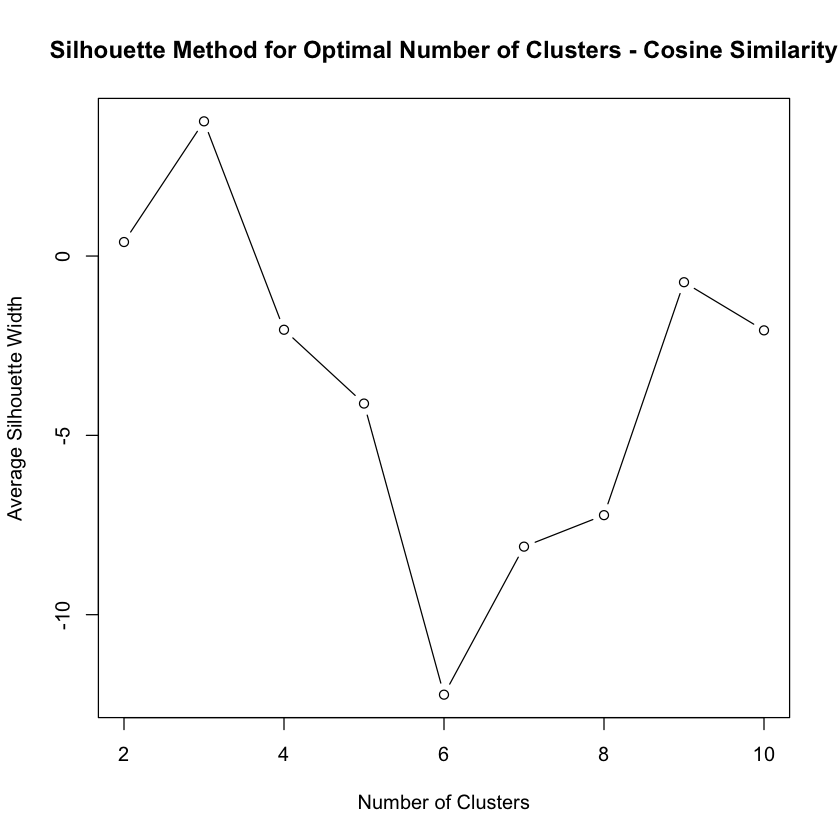

In [12]:
silhouette_scores <- sapply(2:10, function(k) {
  clusters <- cutree(hierarchical_cluster, k = k)
  sil <- silhouette(clusters, dist = cosine_dist)
  avg_sil_width <- mean(sil[, "sil_width"])
  return(avg_sil_width)
})

# Plot silhouette scores
plot(2:10, silhouette_scores, type = "b", xlab = "Number of Clusters", ylab = "Average Silhouette Width", main = "Silhouette Method for Optimal Number of Clusters - Cosine Similarity")

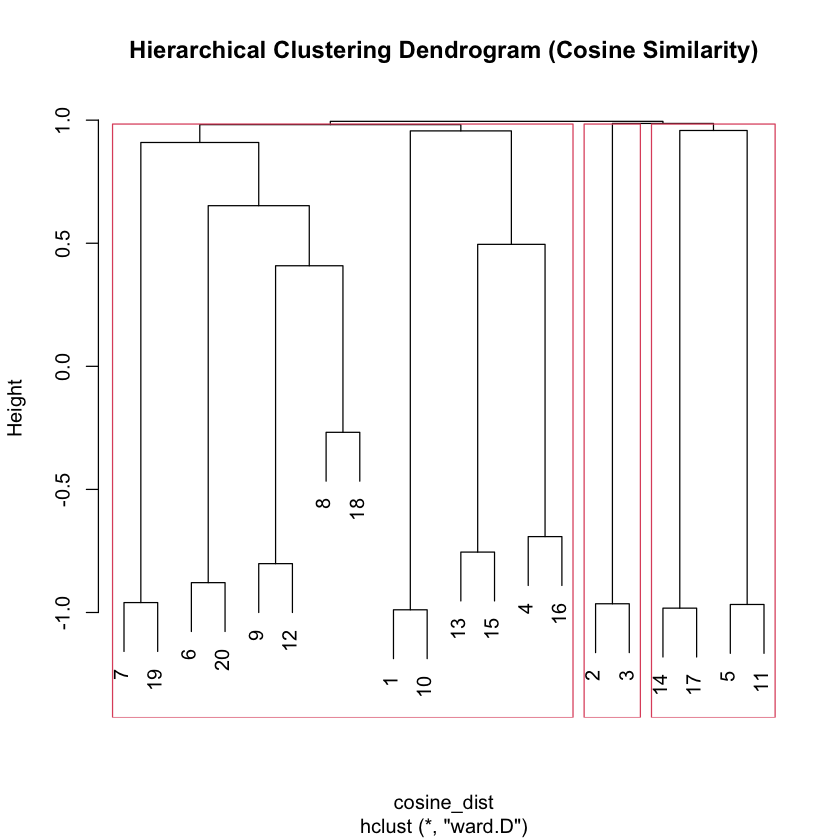

In [7]:
plot(hierarchical_cluster, main = "Hierarchical Clustering Dendrogram (Cosine Similarity)")
rect.hclust(hierarchical_cluster, k = 3)

# hclust with Eucledian Distance

In [8]:
euclidean_dist <- dist(features_m, method = "euclidean")

In [9]:
hierarchical_cluster_eucledian <- hclust(euclidean_dist, method = "ward.D")
hierarchical_cluster_eucledian


Call:
hclust(d = euclidean_dist, method = "ward.D")

Cluster method   : ward.D 
Distance         : Euclidean 
Number of objects: 20 


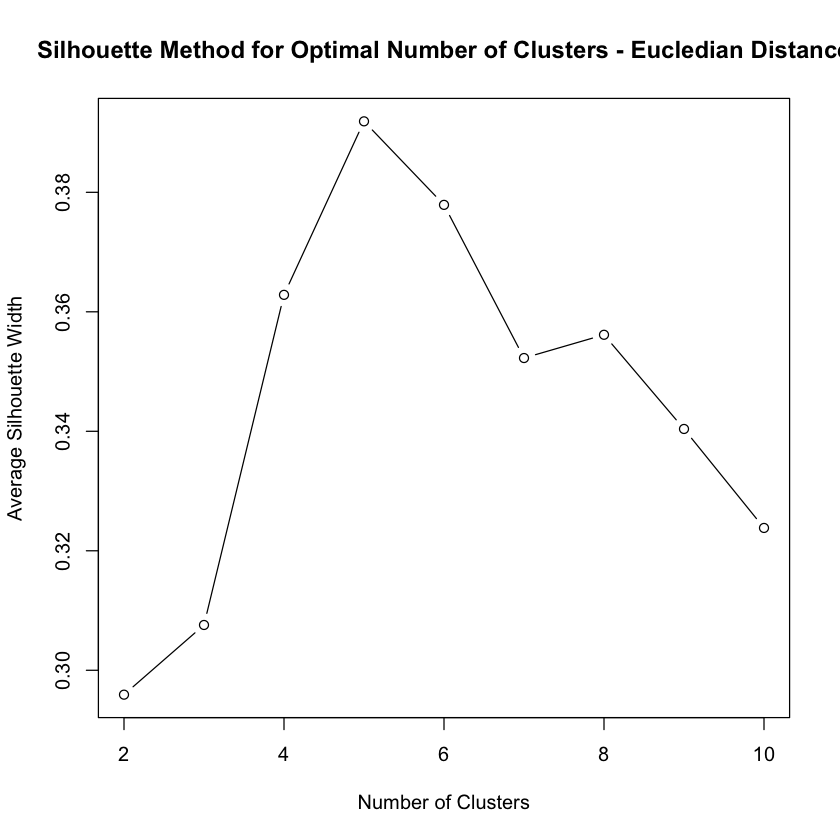

In [13]:
silhouette_scores <- sapply(2:10, function(k) {
  clusters <- cutree(hierarchical_cluster_eucledian, k = k)
  sil <- silhouette(clusters, dist = euclidean_dist)
  avg_sil_width <- mean(sil[, "sil_width"])
  return(avg_sil_width)
})

# Plot silhouette scores
plot(2:10, silhouette_scores, type = "b", xlab = "Number of Clusters", ylab = "Average Silhouette Width", main = "Silhouette Method for Optimal Number of Clusters - Eucledian Distance")

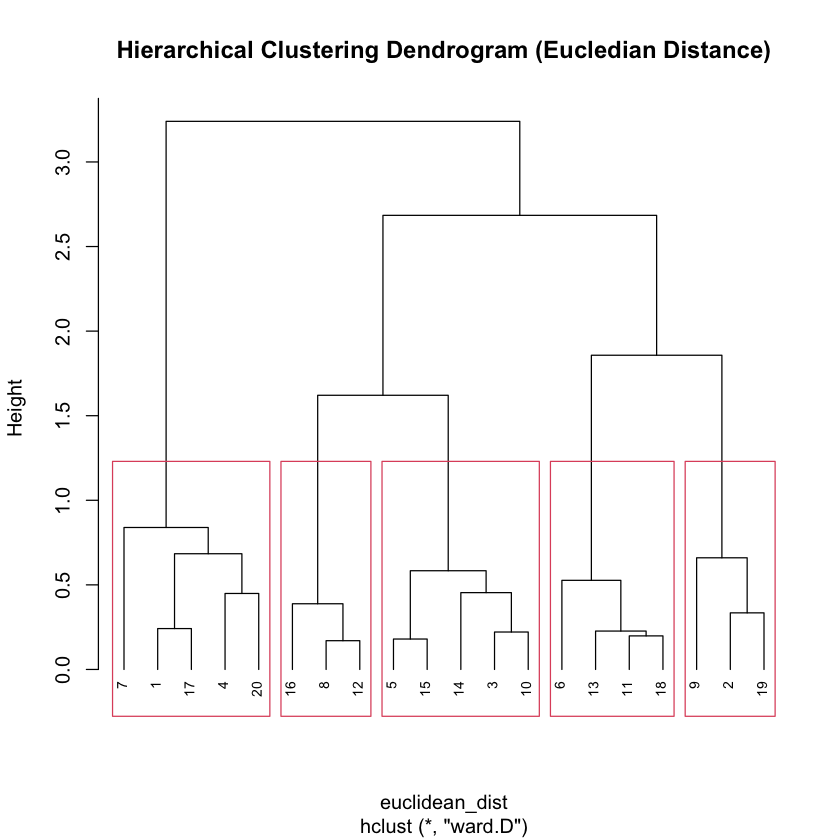

In [11]:
plot(hierarchical_cluster_eucledian, main = "Hierarchical Clustering Dendrogram (Eucledian Distance)", cex=.7, hang=-1)
rect.hclust(hierarchical_cluster_eucledian, k = 5)